# Marketing A/B Testing

## Data dictionary:

### Index: Row index
* user id: User ID (unique)
* test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
* converted: If a person bought the product then True, else is False
* total ads: Amount of ads seen by person
* most ads day: Day that the person saw the biggest amount of ads
* most ads hour: Hour of day that the person saw the biggest amount of ads

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('src/marketing_AB.csv')

In [4]:
df.head(7)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
5,5,1137664,ad,False,734,Saturday,10
6,6,1116205,ad,False,264,Wednesday,13


In [5]:
df.duplicated(subset='user id').sum()

0

In [6]:
df.drop(['Unnamed: 0', 'user id'], axis=1, inplace = True)
df.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


In [7]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [9]:
# Check if the categorical variables have appropriate number of levels
df_cat = df[['test group', 'converted', 'most ads day','most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [10]:
# Check if the categorical variables have a appropriate levels
for i in df_cat.columns:
    print(i.upper(), ":", df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


## Univariate analysis

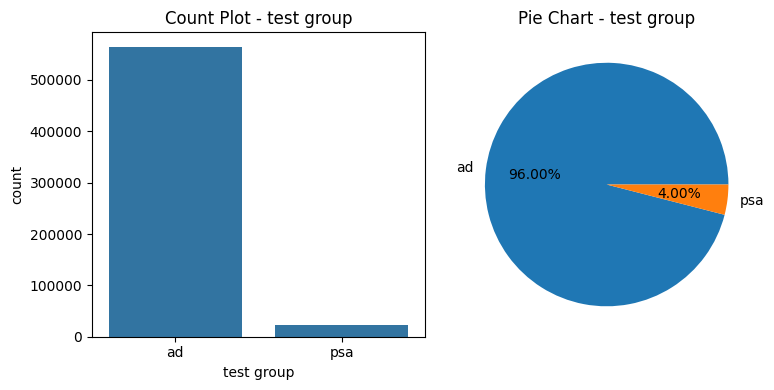

In [11]:
variable = 'test group'

plt.figure(figsize=(8, 4))
# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot - {variable}')

# Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.tight_layout()
plt.show()

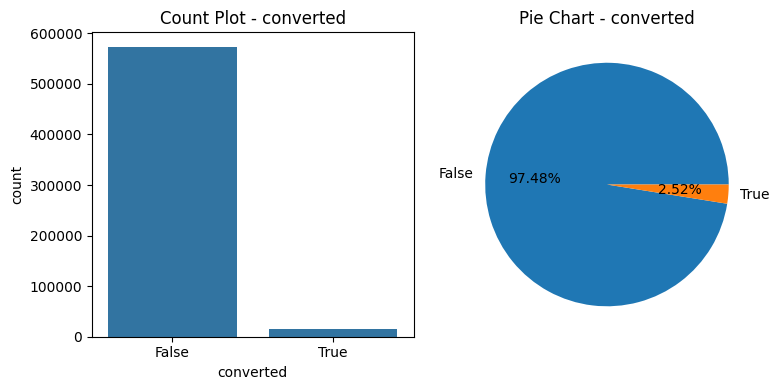

In [13]:
variable = 'converted'

plt.figure(figsize=(8, 4))
# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot - {variable}')

# Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.tight_layout()
plt.show()

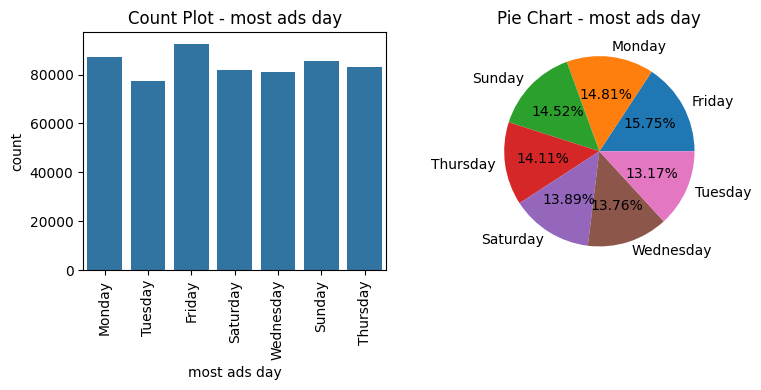

In [15]:
variable = 'most ads day'

plt.figure(figsize=(8, 4))
# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

# Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.tight_layout()
plt.show()

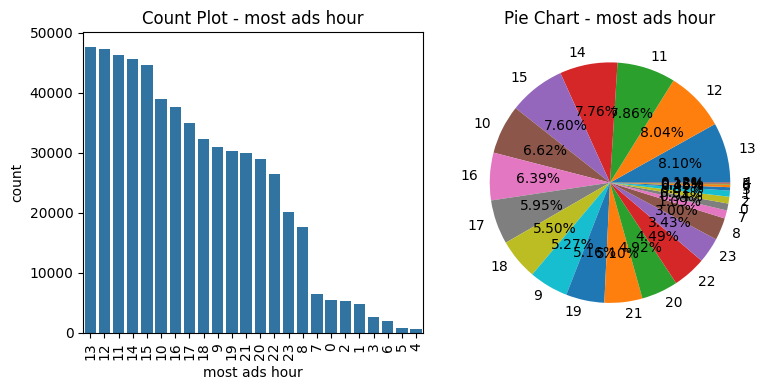

In [17]:
variable = 'most ads hour'

plt.figure(figsize=(8, 4))
# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat, order=df_cat[variable].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

# Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.tight_layout()
plt.show()

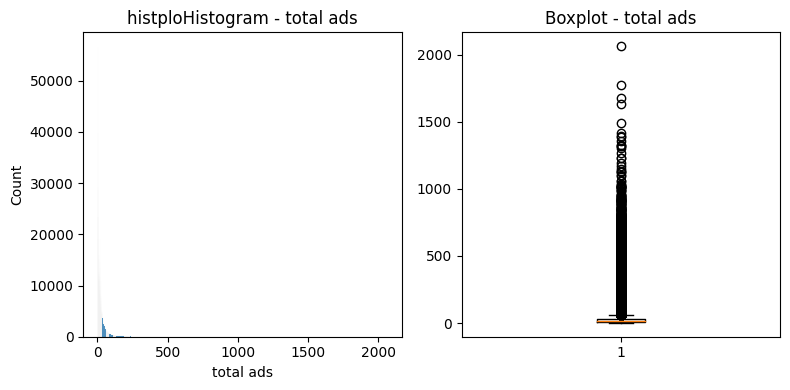

In [24]:
variable = 'total ads'

plt.figure(figsize=(8, 4))
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(x=variable, data=df)
plt.title(f'histploHistogram - {variable}')

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(x = variable, data= df)
plt.title(f'Boxplot - {variable}')

plt.tight_layout()
plt.show()

In [25]:
# Let's chech the description stats of this feature
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

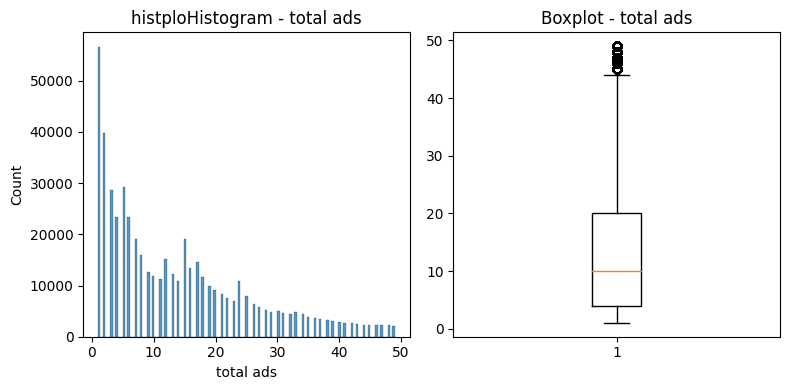

In [26]:
variable = 'total ads'

plt.figure(figsize=(8, 4))
# Histogram
plt.subplot(1, 2, 1)
# Filtering the data for a value close to 75% only for better visualization
sns.histplot(x=variable, data=df[df['total ads'] < 50])
plt.title(f'histploHistogram - {variable}')

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(x = variable, data=df[df['total ads'] < 50])
plt.title(f'Boxplot - {variable}')

plt.tight_layout()
plt.show()

## Bivariate analysis

In [28]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [30]:
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize='index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854
